In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import csv

In [2]:
# read in scrubbed data from original data-set
nissan_df=pd.read_csv("Data/Cleaned_Data.csv")
nissan_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [3]:
#Determining model availability in Tennessee

tn_df = nissan_df.loc[nissan_df['State']==' TN']
tn_df.set_index('Vin')
tnmodel = tn_df.groupby('New_Model')
tnmodelcount = tnmodel['Vin'].count()
tnmodelcount.head(10)

New_Model
370Z           24
Altima        474
Armada         49
GT-R           11
Maxima        106
Murano        112
NV             10
Pathfinder    128
Quest          40
Rogue         300
Name: Vin, dtype: int64

In [4]:
tn_df.New_Model.nunique()

14

In [5]:
tn_df.New_Model.value_counts().head(1).index[0]

'Altima'

In [6]:
altima_df = tn_df.loc[tn_df['New_Model']=='Altima']
tn_df.set_index('Vin').head(30)

,Price,Year,Mileage,City,State,Make,Model,New_Model
Vin,,,,,,,,
3N1CN7APXHL863246,10325,2017,215,Oak Ridge,TN,Nissan,Versa,Versa
1N4AL3AP5FC431407,14225,2015,27753,Clarksville,TN,Nissan,Altima2.5,Altima
3N1CN7AP1HL867962,10432,2017,921,Oak Ridge,TN,Nissan,Versa,Versa
1N4AL2AP0CN410488,7975,2012,51003,Knoxville,TN,Nissan,Altima4dr,Altima
1N4AL3AP7GN367909,13425,2016,40256,Memphis,TN,Nissan,Altima2.5,Altima
1N4AL3AP3GC218263,12495,2016,32341,Columbia,TN,Nissan,Altima2.5,Altima
1N4AL3AP3GC197866,13825,2016,38536,Nashville,TN,Nissan,Altima2.5,Altima
1N4AL3AP7GN324431,13477,2016,52854,Clarksville,TN,Nissan,Altima2.5,Altima
1N4AL3APXGC212962,14725,2016,28082,Nashville,TN,Nissan,Altima2.5,Altima


In [7]:
# Select four years to compare and add combine them in a list
Year_Model = ['2014','2015','2016','2017']

# Call in the merged dataframe and use the list to narrow the results down to the four treatments
years = altima_df[altima_df['Year'].isin(Year_Model)]

# View the dataframe
years.count()

Price        367
Year         367
Mileage      367
City         367
State        367
Vin          367
Make         367
Model        367
New_Model    367
dtype: int64

In [9]:
years_model = years.sort_values(by="Year").drop(['Price'], axis=1)
years_model = years_model.groupby(["New_Model", "Year"]).count()
years_model = pd.pivot_table(years_model, values="Mileage", index="Year", columns="New_Model")
years_model

New_Model,Altima
Year,
2014,82
2015,123
2016,118
2017,44


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


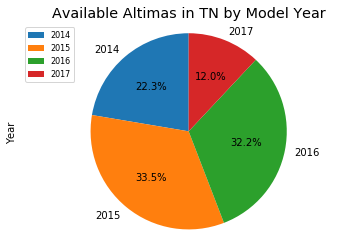

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Find the list of index values in the groupby dataframe for labels
years = list(years_model.index.values)

# 'Pyplot' returns the percentages for the values, set colors
plt.pie(years_model, labels=years,
        autopct='%1.1f%%', startangle=90)
plt.rcParams['font.size'] = 12
plt.title('Available Altimas in TN by Model Year')
plt.ylabel('Year')
plt.axis('equal')
plt.legend(loc='upper left',fontsize=8)

plt.savefig('PNG_Files/Part_2_Years_Pie.png')
plt.show()